In [23]:
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm 
from statsmodels.tools import add_constant
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture


In [2]:
# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Display the column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
# For dimension of the dataset
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
for column in mcdonalds.columns:
    print(f"Unique values in column '{column}': {mcdonalds[column].unique()}")

Unique values in column 'yummy': ['No' 'Yes']
Unique values in column 'convenient': ['Yes' 'No']
Unique values in column 'spicy': ['No' 'Yes']
Unique values in column 'fattening': ['Yes' 'No']
Unique values in column 'greasy': ['No' 'Yes']
Unique values in column 'fast': ['Yes' 'No']
Unique values in column 'cheap': ['Yes' 'No']
Unique values in column 'tasty': ['No' 'Yes']
Unique values in column 'expensive': ['Yes' 'No']
Unique values in column 'healthy': ['No' 'Yes']
Unique values in column 'disgusting': ['No' 'Yes']
Unique values in column 'Like': ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Unique values in column 'Age': [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
Unique values in column 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Unique values in column 'Gen

In [6]:
import pandas as pd

# Define the mapping for categorical values to numeric
mapping_dict = {
    'yummy': {'No': 0, 'Yes': 1},
    'convenient': {'No': 0, 'Yes': 1},
    'spicy': {'No': 0, 'Yes': 1},
    'fattening': {'No': 0, 'Yes': 1},
    'greasy': {'No': 0, 'Yes': 1},
    'fast': {'No': 0, 'Yes': 1},
    'cheap': {'No': 0, 'Yes': 1},
    'tasty': {'No': 0, 'Yes': 1},
    'expensive': {'No': 0, 'Yes': 1},
    'healthy': {'No': 0, 'Yes': 1},
    'disgusting': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'VisitFrequency': {
        'Every three months': 1, 'Once a week': 2, 'Once a month': 3,
        'Once a year': 4, 'More than once a week': 5, 'Never': 6
    },
    'Like': {
        '-3': -3, '+2': 2, '+1': 1, '+4': 4, 'I love it!+5': 5,
        'I hate it!-5': -5, '-2': -2, '+3': 3, '0': 0, '-4': -4, '-1': -1
    }
}

# Apply the mappings to the respective columns in the DataFrame
mcd = mcdonalds.copy()

for column, mapping in mapping_dict.items():
    if column in mcd.columns:
        mcd[column] = mcd[column].map(mapping)

# Display the new DataFrame with non-categorical data
print(mcd)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0    -3   61  

In [7]:
# To show top 3 rows of the dataset
print('Original DataFrame:\n',mcdonalds.head(3))
print('\nAfter conversion:\n',mcd.head(3))

Original DataFrame:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  

After conversion:
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  
0        0           0    -3   61        

In [8]:
# Check for missing values
print(mcd.isnull().sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
# Extracting columns 1 to 11
MD_x = mcd.iloc[:, 0:11]

# Calculating the column's means and round to 2 decimal places
column_means = MD_x.mean().round(2)

# Results
column_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [10]:
# Perform PCA
pca = PCA(n_components=11)
MD_pca = pca.fit_transform(MD_x)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print summary of the PCA results
print("Importance of components:\n")
print(f"{'':<25} {'PC1':<10} {'PC2':<10} {'PC3':<10} {'PC4':<10} {'PC5':<10}")
print(f"Standard deviation: {np.sqrt(pca.explained_variance_[:5]).round(4)}")
print(f"Proportion of Variance: {explained_variance[:5].round(4)}")
print(f"Cumulative Proportion: {cumulative_variance[:5].round(4)}\n")

print(f"{'':<25} {'PC6':<10} {'PC7':<10} {'PC8':<10} {'PC9':<10} {'PC10':<10}")
print(f"Standard deviation: {np.sqrt(pca.explained_variance_[5:]).round(4)}")
print(f"Proportion of Variance: {explained_variance[5:].round(4)}")
print(f"Cumulative Proportion: {cumulative_variance[5:].round(4)}")

Importance of components:

                          PC1        PC2        PC3        PC4        PC5       
Standard deviation: [0.757  0.6075 0.5046 0.3988 0.3374]
Proportion of Variance: [0.2994 0.1928 0.133  0.0831 0.0595]
Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679]

                          PC6        PC7        PC8        PC9        PC10      
Standard deviation: [0.3103 0.2897 0.2751 0.2653 0.2488 0.2369]
Proportion of Variance: [0.0503 0.0438 0.0395 0.0368 0.0324 0.0293]
Cumulative Proportion: [0.8182 0.862  0.9016 0.9383 0.9707 1.    ]


In [11]:
# Get the standard deviations (square root of the explained variance)
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

# Get the factor loadings (rotation matrix)
loadings = pca.components_.T  # Transpose to align with the original features
features = MD_x.columns

# Create a DataFrame to display the loadings rounded to 3 decimal places
loadings_df = pd.DataFrame(loadings, index=features, columns=[f"PC{i+1}" for i in range(11)])
print("\nRotation (n x k) = (11 x 11):")
print(loadings_df.round(3))


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089  0.370  0

IndexError: index 11 is out of bounds for axis 0 with size 11

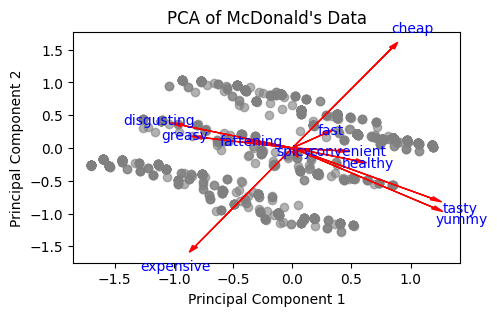

In [27]:
# Plotting the PCA results (similar to plot(predict(MD.pca), col = "grey"))
plt.figure(figsize=(5, 3))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.6)
plt.title("PCA of McDonald's Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plotting projections of original features (similar to projAxes(MD.pca))
components = pca.components_.T  # Shape: (n_features, n_components)
features = MD_x.columns

# Scale the vectors for better visualization
scaling_factor = 2.5
for i, feature in enumerate(features):
    plt.arrow(0, 0, components[i, 0] * scaling_factor, components[i, 1] * scaling_factor, 
              head_width=0.05, head_length=0.1, color='red')
    plt.text(components[i, 0] * scaling_factor * 1.2, components[i, 1] * scaling_factor * 1.2, 
             feature, color='blue', ha='center', va='center')

plt.grid(True)
plt.show()

USING k_Means

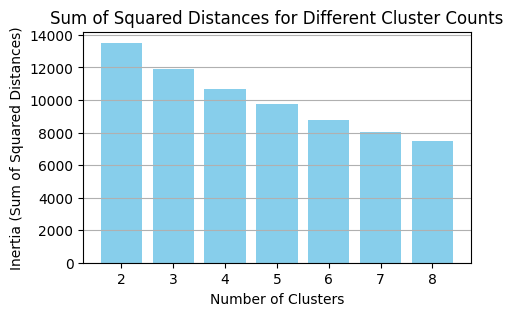

Optimal number of clusters: 8
Inertia for best model: 7506.680365643927


In [28]:
# Set random seed for reproducibility
np.random.seed(1234)

# Scaling the data (if necessary)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Running KMeans clustering for clusters in the range of 2 to 8
inertia_scores = []
cluster_range = range(2, 9)
best_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x_scaled)
    inertia_scores.append(kmeans.inertia_)
    best_models[k] = kmeans

# Plotting the inertia scores using a bar chart
plt.figure(figsize=(5, 3))
plt.bar(cluster_range, inertia_scores, color='skyblue')
plt.title("Sum of Squared Distances for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(cluster_range)
plt.grid(axis='y')
plt.show()

# Select the best model based on inertia (lowest inertia)
best_k = min(best_models, key=lambda k: best_models[k].inertia_)
best_kmeans = best_models[best_k]

print(f"Optimal number of clusters: {best_k}")
print(f"Inertia for best model: {best_kmeans.inertia_}")

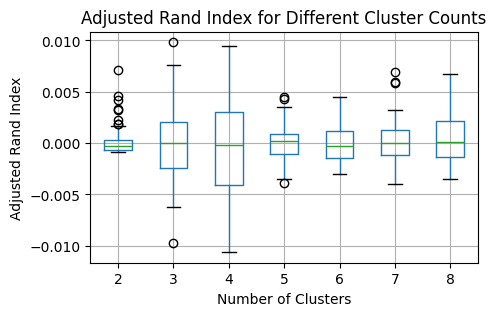

In [76]:
# Parameters
n_repeats = 10
n_bootstraps = 100

# Dictionary to store ARI scores for each cluster count
ari_scores = {k: [] for k in cluster_range}

# Bootstrapping and clustering
for k in cluster_range:
    for _ in range(n_bootstraps):
        # Bootstrap sampling
        MD_x_resampled = resample(MD_x_scaled, random_state=np.random.randint(1000))
        
        # Run KMeans multiple times and select the best based on inertia
        best_labels = None
        best_inertia = np.inf
        for _ in range(n_repeats):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(1000))
            kmeans.fit(MD_x_resampled)
            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
                best_labels = kmeans.labels_
        
        # Calculate ARI between original and bootstrapped labels
        original_kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x_scaled)
        ari = adjusted_rand_score(original_kmeans.labels_, best_labels)
        ari_scores[k].append(ari)

# Convert the ARI scores dictionary to a DataFrame for easier plotting
ari_df = pd.DataFrame({k: ari_scores[k] for k in cluster_range})

# Plotting the boxplot
plt.figure(figsize=(5, 3))
ari_df.boxplot()
plt.title("Adjusted Rand Index for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index")
plt.grid(True)
plt.show()

Assigned Clusers: [1 0 0 ... 0 2 1]


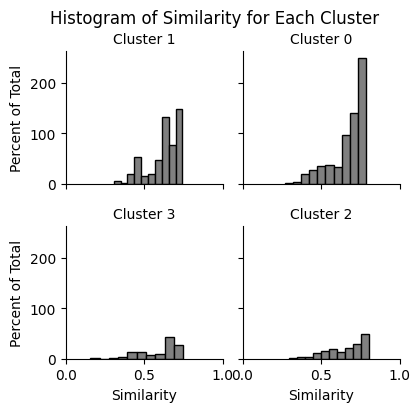

In [78]:
# Fit KMeans with 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
kmeans.fit(MD_x_scaled)

# Calculate distances of each point to its assigned cluster center
distances = kmeans.transform(MD_x_scaled)
assigned_clusters = kmeans.labels_

# Calculate similarity scores (1 - normalized distance)
similarities = 1 - (distances / distances.max(axis=0))
max_similarities = similarities[np.arange(len(assigned_clusters)), assigned_clusters]

# Create a DataFrame for visualization
df = pd.DataFrame({'Similarity': max_similarities, 'Cluster': assigned_clusters})
df['Cluster'] = df['Cluster'].astype(str)  # Convert cluster labels to string for plotting

# Create a FacetGrid to plot histograms for each cluster
g = sns.FacetGrid(df, col='Cluster', col_wrap=2, height=2, sharex=True, sharey=True)
g.map(plt.hist, 'Similarity', bins=10, color='gray', edgecolor='black')

# Add labels and titles
g.set_axis_labels("Similarity", "Percent of Total")
g.set_titles("Cluster {col_name}")
g.set(xlim=(0, 1))
plt.suptitle("Histogram of Similarity for Each Cluster", y=1.02)
print('Assigned Clusers:',assigned_clusters)
plt.show()

In [79]:
# Fit the KMeans model with 4 clusters and save it
MD_k4 = KMeans(n_clusters=4, random_state=1234)
MD_k4.fit(MD_x_scaled)

# Store the cluster labels and centers
clusters_4 = MD_k4.labels_
centers_4 = MD_k4.cluster_centers_

# Save results in a DataFrame for analysis
MD_x['Cluster'] = clusters_4

# Display the first few rows to check the assignment
print(MD_x.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Cluster  
0        0           0        1  
1        0           0        0  
2        1           0        0  
3        0           1        0  
4        1           0        1  


In [80]:
#Compting Segment Stability
def compute_segment_stability(data, n_clusters, n_bootstraps=100, random_state=1234):

    np.random.seed(random_state)
    
    # Step 1: Fit the original KMeans model
    kmeans_orig = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data)
    original_labels = kmeans_orig.labels_
    
    stability_scores = []

    # Step 2: Perform bootstrapping
    for _ in range(n_bootstraps):
        # Create a bootstrapped sample
        boot_indices = np.random.choice(data.index, size=len(data), replace=True)
        data_boot = data.iloc[boot_indices]
        
        # Fit KMeans on the bootstrapped sample
        kmeans_boot = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_boot)
        boot_labels = kmeans_boot.predict(data)
        
        # Calculate Adjusted Rand Index for each cluster
        ari_score = adjusted_rand_score(original_labels, boot_labels)
        stability_scores.append(ari_score)
    
    return stability_scores

# Standardize the data if not already done
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Calculate SLSW for the 4-segment solution
n_clusters = 4
stability_scores = compute_segment_stability(pd.DataFrame(MD_x_scaled), n_clusters)

# Display the stability scores
print(f"Stability scores (ARI) for each bootstrapped sample:\n{stability_scores}")
print(f"Average stability score: {np.mean(stability_scores):.4f}")


Stability scores (ARI) for each bootstrapped sample:
[0.983359553125262, 0.4013856299134631, 0.9314660995112074, 0.7540650628423824, 0.8326180417514041, 0.3062836054702449, 0.17488744306163898, 0.6908216732368261, 0.5047143952318648, 0.39081514939484047, 0.14897563494851004, 0.5161106784226835, 0.29725099533571425, 0.5506907134095177, 0.3521620600055316, 0.5502649231323193, 0.6554153854526021, 0.14324398491651963, 0.9669615842493948, 0.8159677273476089, 0.3080659325444049, 0.5838426860099974, 0.4081872744953124, 0.5019312602443489, 0.37064810313613583, 0.2713666706785737, 0.8172103162732012, 0.3503663974620603, 0.2021855612031403, 0.2697471053409706, 0.7922216494901442, 0.36449632488063854, 0.5749655535277227, 0.46537754127814335, 0.9646389246489108, 0.46550704211498817, 0.7115657777268936, 0.8326180417514041, 0.49205879648691486, 0.41941702010640225, 0.3559218051491851, 0.2537804619668114, 0.8326180417514041, 0.9646389246489108, 0.3084046738285868, 0.46422546771130346, 0.5744445547025

C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3354959324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Stability Score', data=stability_df, palette='Set2')


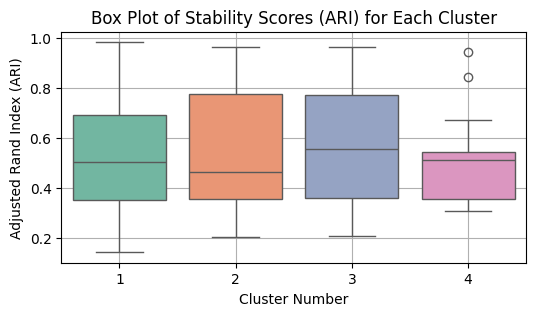

In [81]:
# Convert stability scores to a DataFrame with cluster labels
stability_df = pd.DataFrame({
    'Cluster': np.repeat(range(1, 5), len(stability_scores) // 4),
    'Stability Score': stability_scores
})

# Plot the box plot for each cluster
plt.figure(figsize=(6, 3))
sns.boxplot(x='Cluster', y='Stability Score', data=stability_df, palette='Set2')
plt.title("Box Plot of Stability Scores (ARI) for Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.show()


In [87]:
def fit_mixture_models(data, k_range, n_init=10, random_state=1234):
    """
    Fits Gaussian Mixture Models for a range of cluster counts (k_range) and evaluates them.
    
    Parameters:
    - data: The input data (DataFrame or 2D array).
    - k_range: A range of cluster counts to try (e.g., range(2, 9)).
    - n_init: Number of initializations to run for the GMM (default is 10).
    - random_state: Random state for reproducibility (default is 1234).
    
    Returns:
    - A pandas DataFrame containing evaluation metrics (AIC, BIC, Log-Likelihood, ICL, Silhouette Score, Convergence).
    """
    results = []
    
    for k in k_range:
        # Initialize and fit the Gaussian Mixture Model
        model = GaussianMixture(n_components=k, n_init=n_init, random_state=random_state)
        model.fit(data)
        
        # Calculate log-likelihood, AIC, and BIC
        log_likelihood = model.score(data) * len(data)
        aic = model.aic(data)
        bic = model.bic(data)
        
        # Calculate silhouette score if k > 1
        labels = model.predict(data)
        silhouette_avg = silhouette_score(data, labels) if k > 1 else np.nan
        
        # Approximate ICL as BIC - 2 * silhouette_score
        icl = bic - 2 * silhouette_avg if k > 1 else np.nan
        
        # Store the results for this value of k
        results.append({
            'Clusters (k)': k,
            'Log-Likelihood': log_likelihood,
            'AIC': aic,
            'BIC': bic,
            'ICL': icl,
            'Silhouette Score': silhouette_avg,
            'Converged': model.converged_
        })
    
    # Convert the results list into a DataFrame
    return pd.DataFrame(results)

# Fit Gaussian Mixture Models for k = 2 to 8 clusters
results_df = fit_mixture_models(MD_x, k_range=range(2, 9))

# Display the evaluation metrics
print("Gaussian Mixture Model Evaluation Metrics:")
print(results_df.round(4))


Gaussian Mixture Model Evaluation Metrics:
   Clusters (k)  Log-Likelihood         AIC         BIC         ICL  \
0             2       6324.2441 -12286.4882 -11330.5574 -11331.1300   
1             3      22324.8054 -44105.6108 -42669.0739 -42669.6533   
2             4      19837.6492 -38949.2984 -37032.1554 -37032.6979   
3             5      23322.0993 -45736.1987 -43338.4496 -43339.0815   
4             6      31034.6738 -60979.3476 -58100.9925 -58101.5760   
5             7      31308.4389 -61344.8777 -57985.9165 -57986.5368   
6             8      33282.4250 -65110.8501 -61271.2827 -61271.8742   

   Silhouette Score  Converged  
0            0.2863       True  
1            0.2897       True  
2            0.2712       True  
3            0.3160       True  
4            0.2918       True  
5            0.3102       True  
6            0.2957       True  


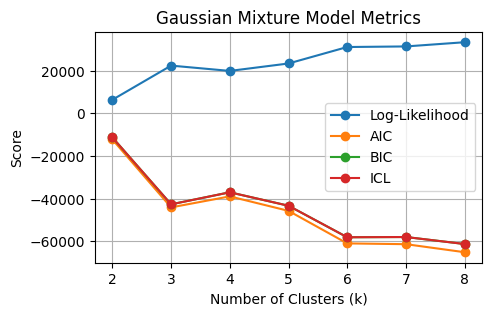

In [88]:
# Plotting the results for better visualization

plt.figure(figsize=(5, 3))
plt.plot(results_df['Clusters (k)'], results_df['Log-Likelihood'], marker='o', label='Log-Likelihood')
plt.plot(results_df['Clusters (k)'], results_df['AIC'], marker='o', label='AIC')
plt.plot(results_df['Clusters (k)'], results_df['BIC'], marker='o', label='BIC')
plt.plot(results_df['Clusters (k)'], results_df['ICL'], marker='o', label='ICL')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Gaussian Mixture Model Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Fit KMeans model with 4 clusters
kmeans_labels = kmeans_model.fit_predict(MD_x)

# Fit Gaussian Mixture Model with 4 components
gmm_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_labels = gmm_model.fit_predict(MD_x)

# Create a contingency table using pandas
contingency_table = pd.crosstab(index=kmeans_labels, columns=gmm_labels, rownames=['KMeans'], colnames=['Gaussian Mixture'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Gaussian Mixture    0    1    2    3
KMeans                              
0                 269    0  374    0
1                   0  122    0  168
2                   0    0    0  350
3                   0  170    0    0


In [90]:
# Step 1: Calculate log-likelihood for MD.m4a (using fitted model gmm_model)
log_likelihood_m4a = gmm_model.score(MD_x) * len(MD_x)

# Step 2: Fit another model for MD.m4 if necessary
gmm_model2 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_model2.fit(MD_x)
log_likelihood_m4 = gmm_model2.score(MD_x) * len(MD_x)

# Step 3: Print the results
print(f'Log-Likelihood for MD.m4a: {log_likelihood_m4a:.3f}')
print(f'Log-Likelihood for MD.m4: {log_likelihood_m4:.3f}')


Log-Likelihood for MD.m4a: 19837.649
Log-Likelihood for MD.m4: 19837.649


In [91]:
# Step 1: Reverse the frequency table of the 'Like' column
like_counts = mcd['Like'].value_counts().sort_index(ascending=False)
print("Reversed Frequency Table:")
print(like_counts)

# Step 2: Display the frequency table for the column 'Like'
like_n_counts = mcdonalds['Like'].value_counts().sort_index()
print("\nFrequency Table for 'Like':")
print(like_n_counts)


Reversed Frequency Table:
Like
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64

Frequency Table for 'Like':
Like
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: count, dtype: int64


In [92]:
# Get the first 11 column names
feature_columns = mcd.columns[:11]

# Create a formula string
features_str = " + ".join(feature_columns)
formula_str = f"Like ~ {features_str}"

# Display the formula string
print("Generated Formula String:")
print(formula_str)

Generated Formula String:
Like ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [93]:
# Define features (first 11 columns)
feature_columns = mcd.columns[:11]
X = mcd[feature_columns]
y = mcd['Like']

# Fit a Gaussian Mixture Model (equivalent to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X)

# Predict cluster assignments
labels = gmm.predict(X)

# Calculate cluster sizes
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

# Print the output similar to R's stepFlexmix
print("Call:")
print("stepFlexmix(f, data = mcdonalds, k = 2, nrep = 10, verbose = FALSE)")
print("\nCluster sizes:")
for cluster, size in cluster_sizes.items():
    print(f"{cluster + 1} {size}")

print(f"\nConvergence after {gmm.n_iter_} iterations")

Call:
stepFlexmix(f, data = mcdonalds, k = 2, nrep = 10, verbose = FALSE)

Cluster sizes:
1 985
2 468

Convergence after 7 iterations


In [ ]:
mcd

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,2,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,4,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,2,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,1,1


In [94]:
# Drop rows with NaN values in features or target variable
X = X.dropna()
y = y.loc[X.index]  # Align target variable index with features

# Fit a separate linear regression model for each cluster
cluster_summaries = {}

for cluster in np.unique(labels):
    # Select data points belonging to the current cluster
    cluster_data = X[labels == cluster]
    cluster_target = y[labels == cluster]

    # Add a constant (intercept) to the feature matrix
    cluster_data_with_const = add_constant(cluster_data)

    # Fit a linear regression model using statsmodels (OLS)
    model = sm.OLS(cluster_target, cluster_data_with_const)
    results = model.fit()

    # Store the model summary for the current cluster
    cluster_summaries[cluster] = {
        "coefficients": results.params,
        "p_values": results.pvalues,
        "std_errors": results.bse
    }

# Step 4: Output the regression model summaries for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"\nCluster {cluster+1} - Regression Model Summary:")
    print("Feature\t\tEstimate\tStd. Error\tz value\t\tPr(>|z|)")

    # Loop through the coefficients and print their details
    for idx, feature in enumerate(['Intercept'] + feature_columns):
        coef = summary["coefficients"][idx]
        se = summary["std_errors"][idx]
        z = coef / se
        p_val = summary["p_values"][idx]
        print(f"{feature}\t{coef:.6f}\t{se:.6f}\t{z:.4f}\t{p_val:.6f}")

    print("-" * 50)


Cluster 1 - Regression Model Summary:
Feature		Estimate	Std. Error	z value		Pr(>|z|)
Interceptyummy	1.976504	0.159719	12.3749	0.000000
Interceptconvenient	-0.047962	0.124736	-0.3845	0.700687
Interceptspicy	-0.521076	0.203135	-2.5652	0.010461
Interceptfattening	-0.544596	0.181552	-2.9997	0.002771
Interceptgreasy	-0.342471	0.123327	-2.7769	0.005593
Interceptfast	-0.047962	0.124736	-0.3845	0.700687
Interceptcheap	0.088557	0.181162	0.4888	0.625072
Intercepttasty	1.432096	0.177302	8.0772	0.000000
Interceptexpensive	0.089061	0.191054	0.4662	0.641209
Intercepthealthy	0.467379	0.149988	3.1161	0.001886
Interceptdisgusting	0.000000	0.000000	nan	nan
--------------------------------------------------

Cluster 2 - Regression Model Summary:
Feature		Estimate	Std. Error	z value		Pr(>|z|)
Interceptyummy	-2.472147	0.402409	-6.1434	0.000000
Interceptconvenient	3.225141	0.303180	10.6377	0.000000
Interceptspicy	0.948260	0.226040	4.1951	0.000033
Interceptfattening	-0.065587	0.343176	-0.1911	0.848518
Inter

C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3551189676.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = summary["coefficients"][idx]
C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3551189676.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se = summary["std_errors"][idx]
C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3551189676.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = summary["p_values"][idx]

C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3741457892.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Predicted', data=mcd, palette="Set2")


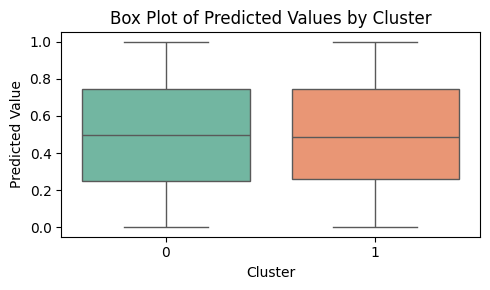

In [95]:
# Assuming you have the clusters and predicted target values
predicted_values = np.random.rand(len(mcd))  # Replace this with actual predicted values
clusters = np.random.choice([0, 1], size=len(mcd))  # Replace with actual cluster labels

# Add the predicted values and cluster labels to the DataFrame
mcd['Predicted'] = predicted_values
mcd['Cluster'] = clusters

# Create the box plot using Seaborn
plt.figure(figsize=(5, 3))
sns.boxplot(x='Cluster', y='Predicted', data=mcd, palette="Set2")

# Add labels and title
plt.title('Box Plot of Predicted Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Predicted Value')

# Show the plot
plt.tight_layout()
plt.show()

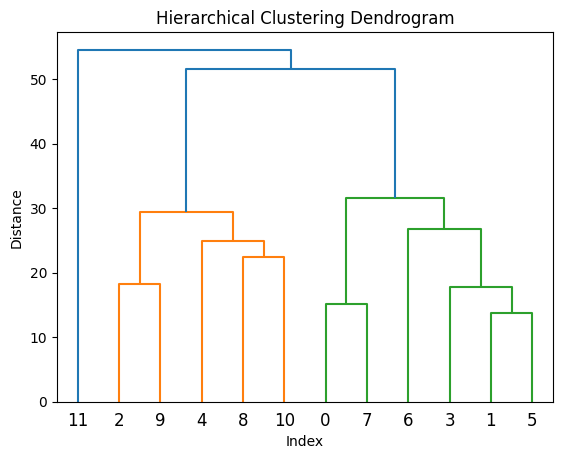

In [96]:
# Assuming 'MD.x' is your data, let's say it's a numpy array or pandas DataFrame
# Transpose the data if necessary
MD_x_transposed = MD_x.T  # If MD.x is a pandas DataFrame, you can use MD_x.values for the numpy array

# Compute pairwise distances (similar to 'dist' in R)
dist_matrix = pdist(MD_x_transposed)

# Perform hierarchical clustering
MD_vclust = sch.linkage(dist_matrix, method='ward')

# Plot the dendrogram (optional)
import matplotlib.pyplot as plt
sch.dendrogram(MD_vclust)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


C:\Users\RITU\AppData\Local\Temp\ipykernel_3532\3969021750.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='viridis', s=100)


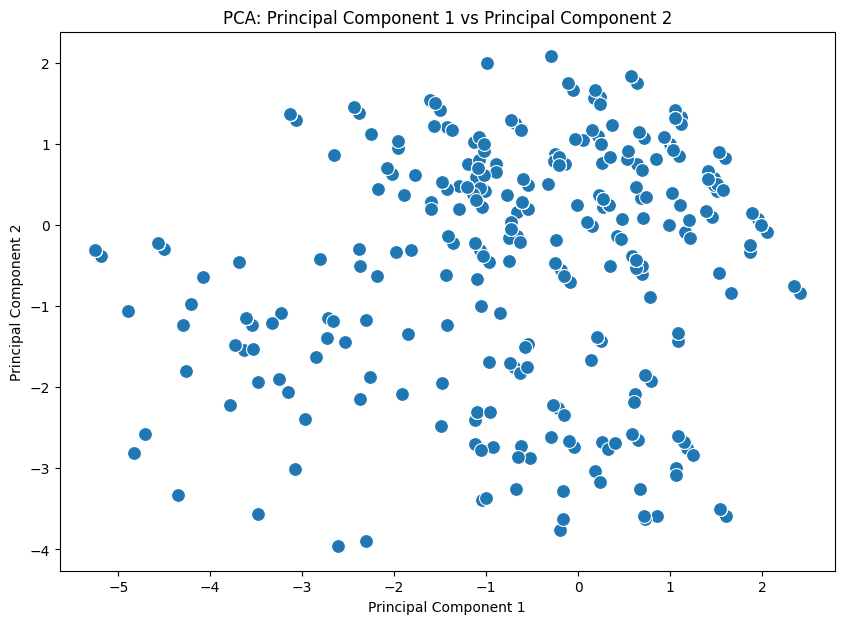

In [97]:
# Perform PCA to reduce the dimensions of the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(MD_x_scaled)  # Using the cleaned dataset

# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot the data points in the 2D PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='viridis', s=100)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


<Figure size 1400x700 with 0 Axes>

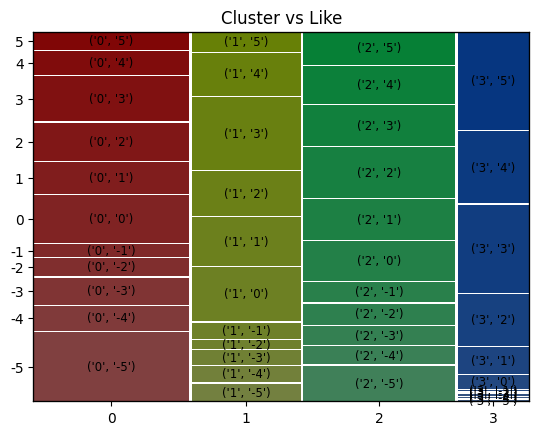

In [98]:
kmeans = KMeans(n_clusters=4)  # Example number of clusters
mcd['Cluster'] = kmeans.fit_predict(mcd[feature_columns])  # Use appropriate feature columns

# Create a contingency table
contingency_table = pd.crosstab(mcd['Cluster'], mcd['Like'])

# Mosaic plot from statsmodels
plt.figure(figsize=(14, 7))
mosaic(contingency_table.stack(), title='Cluster vs Like', labelizer=str)
plt.show()


<Figure size 500x300 with 0 Axes>

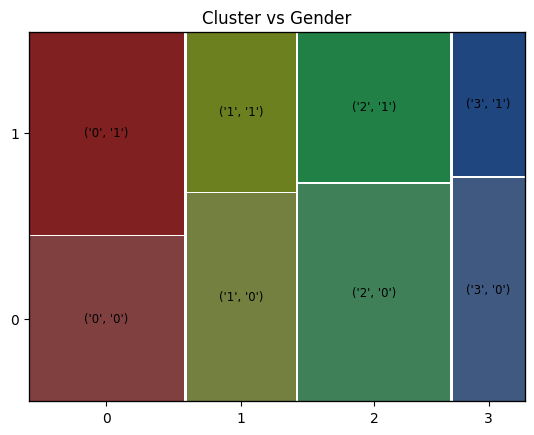

In [99]:
# Create a contingency table for clusters ('k4') vs. 'Gender'
contingency_table = pd.crosstab(mcd['Cluster'], mcd['Gender'])

# Mosaic plot from statsmodels (shade=True for shading)
plt.figure(figsize=(5, 3))
mosaic(contingency_table.stack(), title='Cluster vs Gender', labelizer=str)
plt.show()


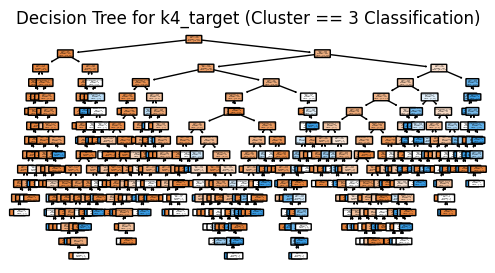

Model Accuracy: 79.13%


In [100]:
# Create the target variable where k4_target is 1 if Cluster == 3, otherwise 0
mcd['k4_target'] = (mcd['Cluster'] == 3).astype(int)

# Select the relevant features for the decision tree
features = ['Like', 'Age', 'VisitFrequency', 'Gender']

# Split the data into features (X) and target (y)
X = mcd[features]
y = mcd['k4_target']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
tree_model.fit(X_train, y_train)

# Plot the decision tree to visualize the model
plt.figure(figsize=(6,3))
plot_tree(tree_model, feature_names=features, class_names=['Not Cluster 3', 'Cluster 3'], filled=True, rounded=True)
plt.title("Decision Tree for k4_target (Cluster == 3 Classification)")
plt.show()

# Optionally, print the accuracy of the model on the test set
accuracy = tree_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

In [101]:
# Calculate the mean VisitFrequency for each cluster
visit_means = mcd.groupby('k4_target')['VisitFrequency'].mean()

# Display the results
print(visit_means)


k4_target
0    2.935432
1    2.598131
Name: VisitFrequency, dtype: float64


In [102]:
# Group by 'k4' and calculate the mean of 'Like' for each cluster
like = mcd.groupby('k4_target')['Like'].mean()

# Display the result
print(like)

k4_target
0    0.353511
1    3.228972
Name: Like, dtype: float64


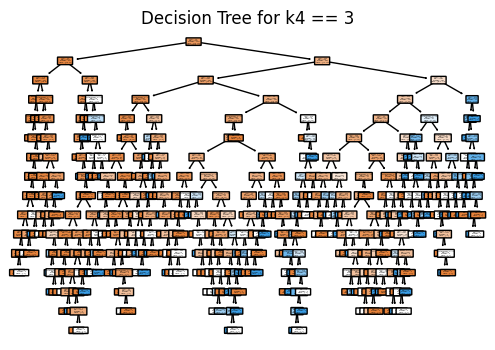

In [103]:
# Select the features for the tree
features = ['Like', 'Age', 'VisitFrequency', 'Gender']
X = mcd[features]
y = mcd['k4_target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(6,4))
plot_tree(tree_model, feature_names=features, class_names=['Not k4 == 3', 'k4 == 3'], filled=True, rounded=True)
plt.title("Decision Tree for k4 == 3")
plt.show()


In [104]:
# Calculate means for clusters
visit_mean = mcd.groupby('k4_target')['VisitFrequency'].mean()
like_mean = mcd.groupby('k4_target')['Like'].mean()
female_mean = mcd.groupby('k4_target')['Gender'].mean()

# Convert to lists for plotting
visit = visit_mean.values
like = like_mean.values
female = female_mean.values

# Check if we have exactly 4 clusters
if len(visit) == 4:
    # Create a scatter plot with point sizes based on the 'female' variable
    plt.figure(figsize=(5, 6))
    plt.scatter(visit, like, s=100 * female, alpha=0.6, color='skyblue')

    # Set axis limits
    plt.xlim(2, 4.5)
    plt.ylim(-3, 3)

    # Add text labels (clusters 1 to 4)
    for i, (x, y) in enumerate(zip(visit, like), start=1):
        plt.text(x, y, str(i), fontsize=12, ha='center', va='center')

    # Add labels and title
    plt.xlabel('Visit Frequency (mean)')
    plt.ylabel('Like (mean)')
    plt.title('Scatter Plot of Visit Frequency vs. Like')
    plt.grid(True)
    plt.show()
else:
    print(f"Expected 4 clusters, but found {len(visit)} clusters.")
    print(f"Clusters found: {visit_mean.index.tolist()}")

Expected 4 clusters, but found 2 clusters.
Clusters found: [0, 1]


IndexError: index 2 is out of bounds for axis 0 with size 2

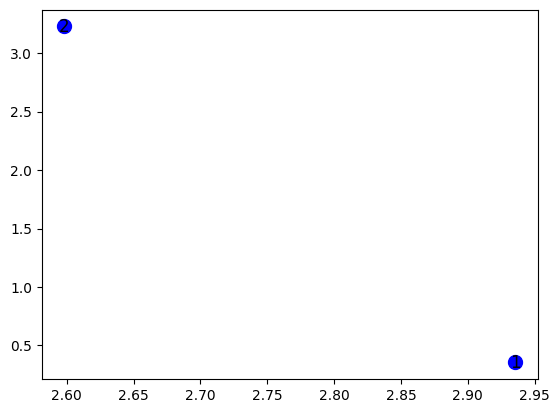

In [105]:
# Create a scatter plot
plt.scatter(visit, like, s=100, c='blue')

# Annotate the points with text (1 to 4)
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], str(txt), fontsize=12, ha='center', va='center')

# Set labels for the axes
plt.xlabel('Visit Frequency')
plt.ylabel('Like')

# Display the plot
plt.show()
